# Student perfomance prediction
## Goal: make a model to predict student grades

# Import and download data section

In [154]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

In [2]:
raw_data = np.genfromtxt('datasets/student_perfomance.csv', delimiter=',', dtype=None, names=True, encoding='utf-8')

# Look at the data

In [3]:
raw_data

array([(0.95822, 3.4, 8.2, 53., 47.), (0.85566, 3.2, 5.9, 55., 35.),
       (0.68025, 3.2, 9.3, 41., 32.), ..., (0.88197, 3.9, 6.2, 54., 36.),
       (0.47336, 3.5, 7.3, 61., 34.), (0.58119, 3.7, 9.7, 79., 35.)],
      dtype=[('Socioeconomic_Score', '<f8'), ('Study_Hours', '<f8'), ('Sleep_Hours', '<f8'), ('Attendance_', '<f8'), ('Grades', '<f8')])

In [256]:
soc_score = raw_data['Socioeconomic_Score']
study_daily = raw_data['Study_Hours']
sleep_daily = raw_data['Sleep_Hours']
attendance = raw_data['Attendance_']

grades = raw_data['Grades']

In [257]:
len(soc_score)

1388

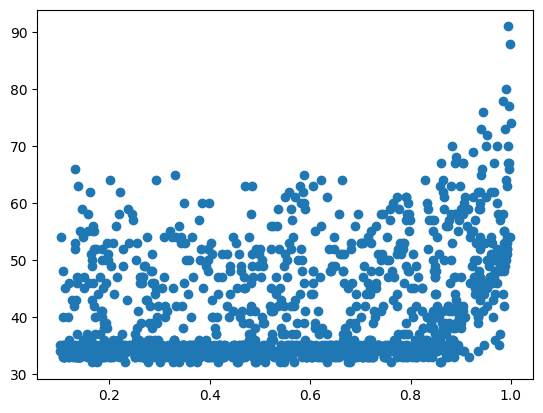

In [258]:
plt.scatter(soc_score, grades)

# Normalization

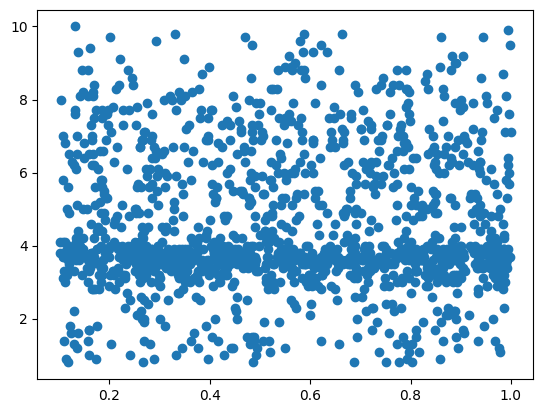

In [259]:
plt.scatter(soc_score, study_daily)

In [260]:
soc_score_norm = soc_score
study_daily_norm = study_daily / 10
sleep_daily_norm = (sleep_daily - 5) / 5
attendance_norm = (attendance - 40) / 60

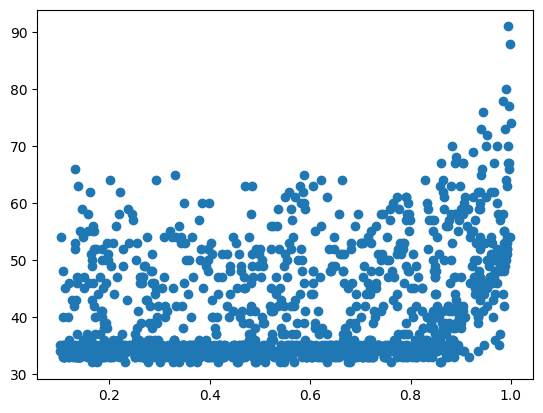

In [261]:
plt.scatter(soc_score, grades)

In [262]:
x_train = np.c_[soc_score_norm, study_daily_norm, sleep_daily_norm, attendance_norm]
y_train = grades

In [263]:
grades

array([47., 35., 32., ..., 36., 34., 35.])

# Error function

In [216]:
def compute_cost(x, y, w, b):
    m = x.shape[0]
    total_cost = 0

    for i in range(m):
        f_wb = np.dot(x[i], w) + b
        total_cost += (f_wb - y[i])**2

    total_cost /= (2 * m)
    return total_cost
    

In [191]:
compute_cost(x_train, y_train, np.array([0, 0, 0, 0]), 0)

872.6880403458214

# Gradient descent

In [219]:
def compute_descent_der(x, y, w, b):
    m = x.shape[0]
    n = x.shape[1]
    dj_dw = np.zeros(n)
    dj_wb = 0

    for i in range(m):
        err = (np.dot(x[i], w) + b - y[i])
        dj_dw += err * x[i]
        dj_wb += err
            
    dj_dw = dj_dw / m
    dj_wb = dj_wb / m

    return dj_dw, dj_wb
        

In [220]:
def compute_gradient_descent(x, y, w, b, compute_cost, compute_descent_der, alpha, iterations):
    J_hist = []
    
    for i in range(iterations):
        dj_dw, dj_db = compute_descent_der(x, y, w, b)
        w_new = w - alpha * dj_dw
        b_new = b - alpha * dj_db

        w = w_new
        b = b_new

        J_hist.append(compute_cost(x, y, w, b))
        
        if i% math.ceil(iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_hist[-1]:8.2f}   ")

    return w, b, J_hist

In [264]:
start_w = np.array([0, 0, 0, 0])
start_b = 0

w, b, J_hist = compute_gradient_descent(x_train, y_train, start_w, start_b, compute_cost, compute_descent_der, 1e-1, 1000)

Iteration    0: Cost   569.37   
Iteration  100: Cost    19.51   
Iteration  200: Cost    15.08   
Iteration  300: Cost    13.23   
Iteration  400: Cost    12.21   
Iteration  500: Cost    11.56   


KeyboardInterrupt: 

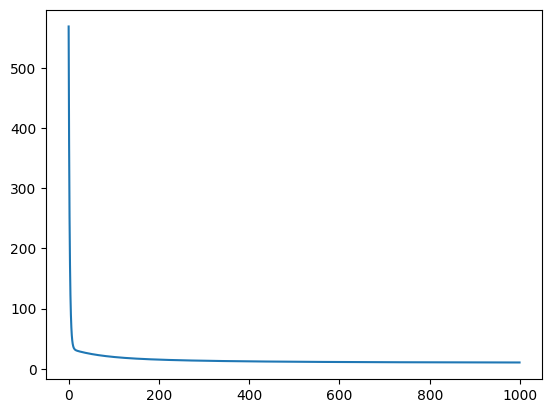

In [222]:
plt.plot(np.arange(np.array(J_hist).shape[0]), np.array(J_hist))

In [223]:
w, b

(array([11.84448401, 38.72047401,  0.16317581, -1.02079321]),
 16.729343510079428)

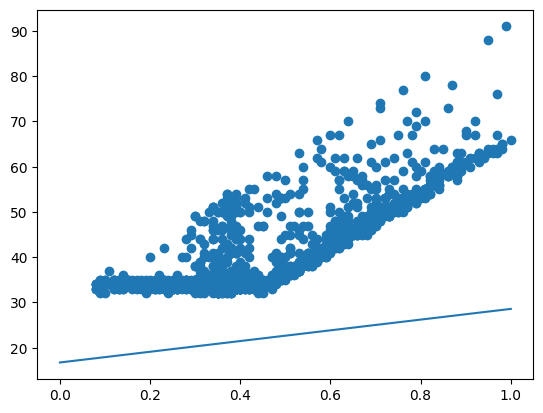

In [227]:
plt.scatter(study_daily_norm, grades)

x_1 = 0
x_2 = 1
plt.plot(np.array([x_1, x_2]), np.array([x_1 * w[0] + b, x_2 * w[0] + b]))

# Play with input

## Delete sleep

Looks like sleep rate isn't important


0) soc score
1) study daily
2) attendance

In [229]:
x_train = np.c_[soc_score_norm, study_daily_norm, attendance_norm]
y_train = grades

In [234]:
start_w = np.array([0, 0, 0])
start_b = 0

w, b, J_hist = compute_gradient_descent(x_train, y_train, start_w, start_b, compute_cost, compute_descent_der, 1e-1, 1000)

Iteration    0: Cost   618.04   
Iteration  100: Cost    18.00   
Iteration  200: Cost    15.15   
Iteration  300: Cost    13.45   
Iteration  400: Cost    12.36   
Iteration  500: Cost    11.64   
Iteration  600: Cost    11.16   
Iteration  700: Cost    10.84   
Iteration  800: Cost    10.61   
Iteration  900: Cost    10.46   


## Change study shape

In [265]:
soc_score_norm = soc_score
study_daily_norm = study_daily ** 2 / 100
attendance_norm = (attendance - 40) / 60

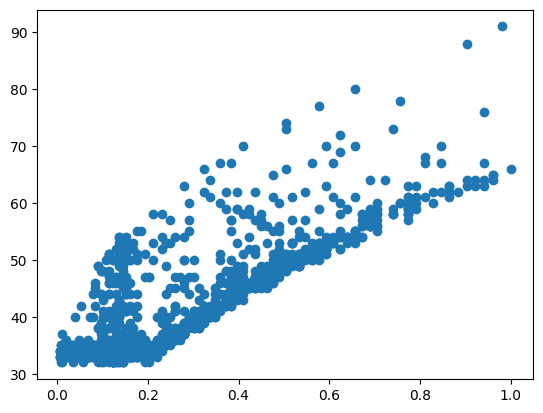

In [266]:
plt.scatter(study_daily_norm, grades)

In [267]:
x_train = np.c_[soc_score_norm, study_daily_norm, attendance_norm]
y_train = grades

In [268]:
start_w = np.array([0, 0, 0])
start_b = 0

w, b, J_hist = compute_gradient_descent(x_train, y_train, start_w, start_b, compute_cost, compute_descent_der, 1e-1, 1000)

Iteration    0: Cost   640.70   
Iteration  100: Cost    17.63   
Iteration  200: Cost    13.33   
Iteration  300: Cost    11.09   
Iteration  400: Cost     9.81   
Iteration  500: Cost     9.03   
Iteration  600: Cost     8.54   
Iteration  700: Cost     8.23   
Iteration  800: Cost     8.02   
Iteration  900: Cost     7.89   


In [277]:
def predict(x, w, b):
    x[0] = x[0]
    x[1] = x[1] ** 2 / 100
    x[3] = (x[3] - 40) / 60

    x_in = np.array([x[0], x[1], x[3]])
    
    return np.dot(x_in, w) + b

In [283]:
predict(np.array([0.9499,3,8.5,90.0]), w, b)

38.99325108687928

In [281]:
w

array([12.13744327, 38.60919324, -1.09687266])